In [1]:
# Importing required data libraries

import pandas as pd
import numpy as np # for data handling
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder # for data preprocessing
from sklearn.model_selection import train_test_split # for train-test split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR # Regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for model evaluation
from sklearn.model_selection import GridSearchCV # for hyperparameter tuning



# 1. Loading and Preprocessing

In [2]:
# Loading dataset
df = pd.read_csv('CarPrice_Assignment.csv')
# Data preview
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# For data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# For basic stat of numerical columns 
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Checking for Missing Values

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Handling Categorical varibles

In [11]:
# to identify categorical columns
df.select_dtypes(include='object').columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [13]:
# Using One-Hot Encoding 

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 191 entries, car_ID to fuelsystem_spfi
dtypes: bool(175), float64(8), int64(8)
memory usage: 60.8 KB


In [15]:
# Using Feature scaling for numerical variables excluding the target variable

# Defining features
x = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Applying stsndard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# 2. Model Implementation

## a) Linear Regression

In [17]:
# Splinting in to features and target
X = df_encoded.drop('price', axis=1) # since we are predicting price we removing it from features
y = df_encoded['price']

In [19]:
# Splitting the dataset for train 90% and for test 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Applying standatrd scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Linear Regression Model

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print(X_train_scaled.shape)
print(y_train.shape)

(184, 190)
(184,)


In [21]:
# Evaluating the model

# prediction
y_pred_lr = lr.predict(X_test_scaled)
# To Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Printing the results
print("Linear Regression Performance;")
print(f"R-squared: {r2_lr:.4f}")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Mean Absolute Error: {mae_lr:.2f}")

Linear Regression Performance;
R-squared: -4000568319853787468529664.0000
Mean Squared Error: 320408859821946789019781118820352.00
Mean Absolute Error: 8558215859596492.00


## b) Decision Tree Regressor

In [23]:
# Using Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train_scaled, y_train) # To train the model
y_pred_dt = dt.predict(X_test_scaled) # To predict

# Evaluating the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
# Printing the results
print("Decision Tree Regressor Performance:")
print(f"R-squared: {r2_dt:.4f}")
print(f"Mean Squared Error: {mse_dt:.2f}")
print(f"Mean Absolute Error: {mae_dt:.2f}")


Decision Tree Regressor Performance:
R-squared: 0.9268
Mean Squared Error: 5865943.98
Mean Absolute Error: 1659.58


## c) Random Forest Regressor

In [33]:
# Creating  the Model

rf = RandomForestRegressor(random_state=42)
# To train the model
rf.fit(X_train_scaled, y_train)
# To prediction
y_pred_rf = rf.predict(X_test_scaled)

# To Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


# To show the output
print("Random Forest Regressor Performance:")
print(f"R-squared: {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"Mean Absolute Error: {mae_rf:.2f}")

Random Forest Regressor Performance:
R-squared: 0.9443
Mean Squared Error: 4464372.70
Mean Absolute Error: 1242.00


## d) Gradient Boosting Regressor

In [35]:
# Creating  the Model
gbr = GradientBoostingRegressor(random_state=42)
# To train the model
gbr.fit(X_train_scaled, y_train)
# To prediction
y_pred_gbr = gbr.predict(X_test_scaled)

# To Evaluate
r2_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)


# To show the output
print("Gradient Boosting Regressor Performance:")
print(f"R-squared: {r2_gbr:.4f}")
print(f"Mean Squared Error: {mse_gbr:.2f}")
print(f"Mean Absolute Error: {mae_gbr:.2f}")

Gradient Boosting Regressor Performance:
R-squared: 0.9370
Mean Squared Error: 5043739.86
Mean Absolute Error: 1369.23


## e) Support Vector Regressor

In [40]:
# Creating  the Model
svr = SVR()
# To train the model
svr.fit(X_train_scaled, y_train)
# To prediction
y_pred_svr = svr.predict(X_test_scaled)

# To Evaluate
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)


# To show the output
print("Support Vector Regressor Performance:")
print(f"R-squared: {r2_svr:.4f}")
print(f"Mean Squared Error: {mse_svr:.2f}")
print(f"Mean Absolute Error: {mae_svr:.2f}")

Support Vector Regressor Performance:
R-squared: -0.0984
Mean Squared Error: 87968534.92
Mean Absolute Error: 5626.30


# 3. Model Evaluation

In [43]:
# Creating a Comparison Table

# Creating a dictionary
data = {
    'Model': [
        'Linear Regression',
        'Decision Tree Regressor',
        'Random Forest Regressor',
        'Gradient Boosting Regressor',
        'Support Vector Regressor'
        ],
        'R-Squared':[
         -4000568319853787468529664.0000,
        0.9268,
        0.9443,
        0.9370,
        -0.0984
        ],
        'Mean Squared Error': [
        320408859821946789019781118820352.00,
        5865943.98,
        4464372.70,
        5043739.86,
        87968534.92,
        ],
        'Mean Absolute Error':[
        8558215859596492.00,
        1659.58,
        1242.00,
        1369.23,
        5626.30
        ]
    }
# Converting dictionary into dataframe
comparison_df = pd.DataFrame(data)

print(comparison_df)
        
        
        
        

                         Model     R-Squared  Mean Squared Error  \
0            Linear Regression -4.000568e+24        3.204089e+32   
1      Decision Tree Regressor  9.268000e-01        5.865944e+06   
2      Random Forest Regressor  9.443000e-01        4.464373e+06   
3  Gradient Boosting Regressor  9.370000e-01        5.043740e+06   
4     Support Vector Regressor -9.840000e-02        8.796853e+07   

   Mean Absolute Error  
0         8.558216e+15  
1         1.659580e+03  
2         1.242000e+03  
3         1.369230e+03  
4         5.626300e+03  


             Feature  Importance
7         enginesize    0.601203
6         curbweight    0.237789
14        highwaympg    0.037826
0             car_ID    0.023345
11        horsepower    0.021351
4           carwidth    0.017364
2          wheelbase    0.008399
10  compressionratio    0.008243
12           peakrpm    0.005527
3          carlength    0.005441


C:\Users\user\AppData\Local\Temp\ipykernel_17688\853096106.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')


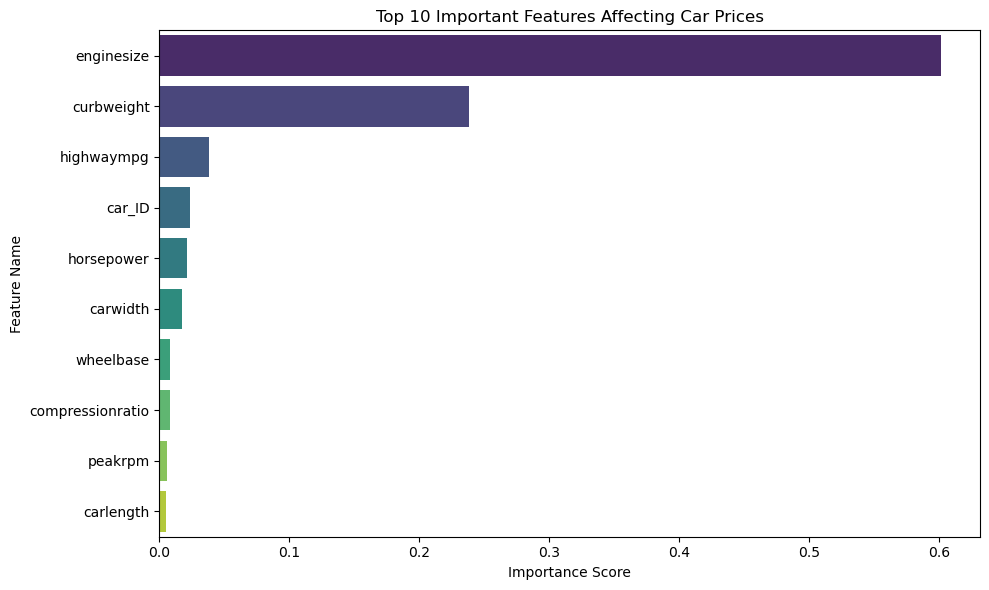

In [51]:
# Geting feature importances from the trained Random Forest model
importances = rf.feature_importances_  

# Get feature names from the training set
feature_names = X_train.columns

# Create a DataFrame to display the importance scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))

# Plotting the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Important Features Affecting Car Prices')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

# 5. Hyperparameter Tuning

In [54]:
# Defining the parameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

In [58]:
# Using Model and Grid Search Cv
# Initializing the model
rf_model = RandomForestRegressor(random_state=42)

# Initializing the Grid Search CV
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=5,            # 5-fold cross-validation
                           n_jobs=-1,       # Use all available cores
                           scoring='r2')   

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# showing the result
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score from CV:", grid_search.best_score_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
94 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\Lib\site-packages\skl

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R-squared Score from CV: 0.8879540541106199


In [60]:
#  Evaluating on Test Set with Tuned Model
# Predict using the best estimator
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Tuned Random Forest Regressor Performance:")
print("R-squared:", r2_score(y_test, y_pred_best_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_best_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_best_rf))

Tuned Random Forest Regressor Performance:
R-squared: 0.9606972962868359
Mean Squared Error: 3147786.383789332
Mean Absolute Error: 1340.9899342607812


## The insights from the model are suggesting product design, feature optimization, and pricing strategies tailored to the US market.